In [7]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
%autoreload 2

In [9]:
from server import Server
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.lines as mlines
from tqdm import tqdm

MAX_REQ = 10000

## Question 1

In [4]:
# save simulation so that we can always reuse same data and match results from report

"""server = Server(max_req=MAX_REQ, arrival_rate=80/1000)
np.save('sim', server.run())"""

"server = Server(max_req=MAX_REQ, arrival_rate=80/1000)\nnp.save('sim', server.run())"

In [5]:
# load simulation
history_num_job_arrived, history_num_job_served, buffer_t1, buffer_t2, buffer, art_1, art_2 = np.load('sim.npy')

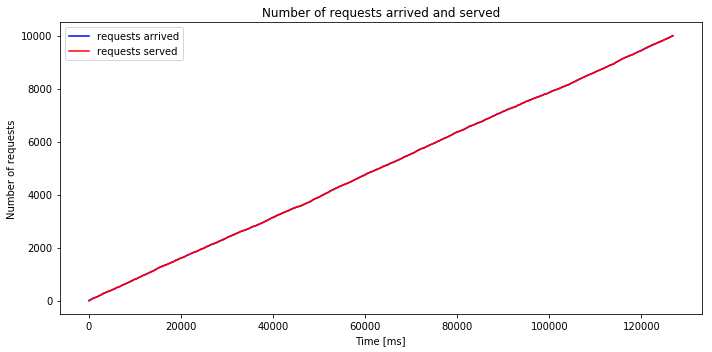

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

x0, y0 = list(zip(*history_num_job_arrived))
x1, y1 = list(zip(*history_num_job_served))

ax.step(x0, y0, c='b', label='requests arrived')
ax.step(x1, y1, c='r', label='requests served')
ax.set_title('Number of requests arrived and served')
ax.set_xlabel('Time [ms]')
ax.set_ylabel('Number of requests')
plt.legend()
plt.tight_layout()
plt.savefig('q1_req.png', dpi=300)

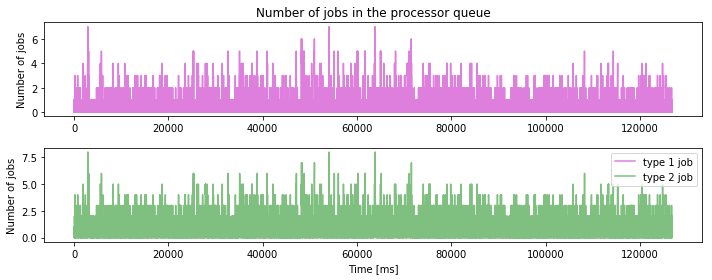

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(10,4))

x0, y0 = list(zip(*buffer_t1))
x1, y1 = list(zip(*buffer_t2))

d0, = ax[0].step(x0, y0, c='m', label='type 1 job', alpha=0.5)
d1, = ax[1].step(x1, y1, c='g', label='type 2 job', alpha=0.5)
ax[0].set_title('Number of jobs in the processor queue')
ax[1].set_xlabel('Time [ms]')
ax[0].set_ylabel('Number of jobs')
ax[1].set_ylabel('Number of jobs')
plt.legend([d0, d1], ['type 1 job', 'type 2 job'])
plt.tight_layout()
plt.savefig('q1_job.png', dpi=300)

In [7]:
print('Average response time for type 1 job: {:.3f}'.format(art_1))
print('Average response time for type 2 job: {:.3f}'.format(art_2))

Average response time for type 1 job: 8.686
Average response time for type 2 job: 4.898


In [8]:
average_response_time_request = (art_1 + art_2) / 1000
print('Average number of type 1 job served per second: {:.3f}'.format(1/average_response_time_request))
print('Average number of type 2 job served per second: {:.3f}'.format(1/average_response_time_request))

Average number of type 1 job served per second: 73.616
Average number of type 2 job served per second: 73.616


## Question 2 

In [9]:
lambdas = [30, 60, 90, 120, 150, 180, 210, 250]

In [ ]:
# save simulations so we can always reuse the same data and match results from report

"""sim_lambdas = []
for lambda_ in tqdm(lambdas):
    server = Server(max_req=MAX_REQ, arrival_rate=lambda_/1000)
    _, _, _, _, buffer, _, _ = server.run()
    x, y = list(zip(*buffer))
    sim_lambdas.append((x,y))
    
np.save('sim_lambdas', sim_lambdas)"""

In [6]:
# load simulation
sim_lambdas = np.load('sim_lambdas.npy')

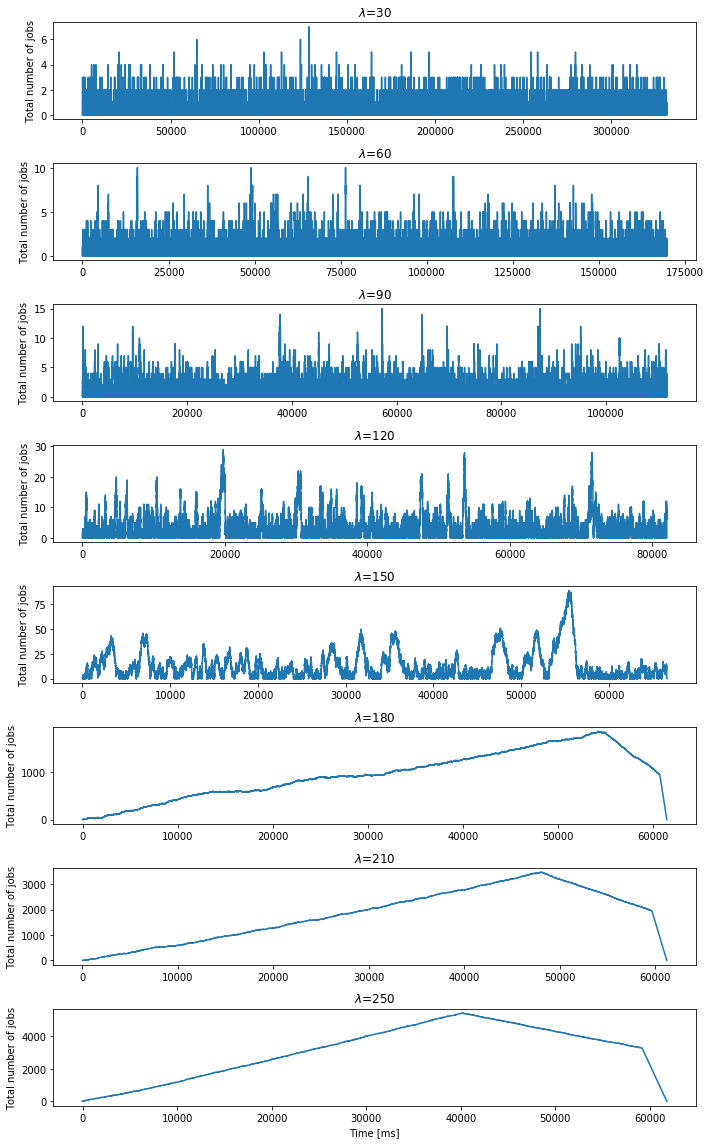

In [22]:
fig, ax = plt.subplots(8, 1, figsize=(10,16))

plt.subplots_adjust(hspace = 0.5)
for (i, time_job_lambda_) in enumerate(list(zip(sim_lambdas, lambdas))):

    x = time_job_lambda_[0][0]
    y = time_job_lambda_[0][1]
    lambda_ = time_job_lambda_[1]
    
    ax[i].step(x, y)
    ax[i].set_title(r"$\lambda$=" + str(lambda_))
    ax[i].set_ylabel("Total number of jobs")

ax[-1].set_xlabel("Time [ms]")
plt.tight_layout()
plt.savefig('q2_lambdas.png', dpi=300)
plt.show()

Verification of lambda found analytically 

In [24]:
def plot_total_num_jobs(lambda_, n=0):
    
    if n==0:
        server = Server(max_req=MAX_REQ, arrival_rate=lambda_/1000)
        _, _, _, _, buffer, _, _ = server.run()

        x, y = list(zip(*buffer))

        fig, ax = plt.subplots(1, 1, figsize=(10,2))
        ax.step(x, y)
        ax.set_title(r"$\lambda$=" + str(lambda_))
        ax.set_xlabel("Time [ms]")
        ax.set_ylabel("Total number of jobs")
        name = 'q2_lambda_{}.png'.format(str(lambda_))
    else:
        fig, ax = plt.subplots(n, 1, figsize=(10,2*n))
        for i in tqdm(range(n)):
            
            server = Server(max_req=MAX_REQ, arrival_rate=lambda_/1000)
            _, _, _, _, buffer, _, _ = server.run()

            x, y = list(zip(*buffer))

            ax[i].step(x, y)
            ax[i].set_ylabel("Total number of jobs")
        
        ax[0].set_title(r"$\lambda$=" + str(lambda_))
        ax[-1].set_xlabel("Time [ms]")
        name='q3_lambda_{}_sim.png'.format(str(lambda_))
    
    plt.tight_layout()
    plt.savefig(name, dpi=300)

100%|██████████| 4/4 [00:22<00:00,  5.57s/it]


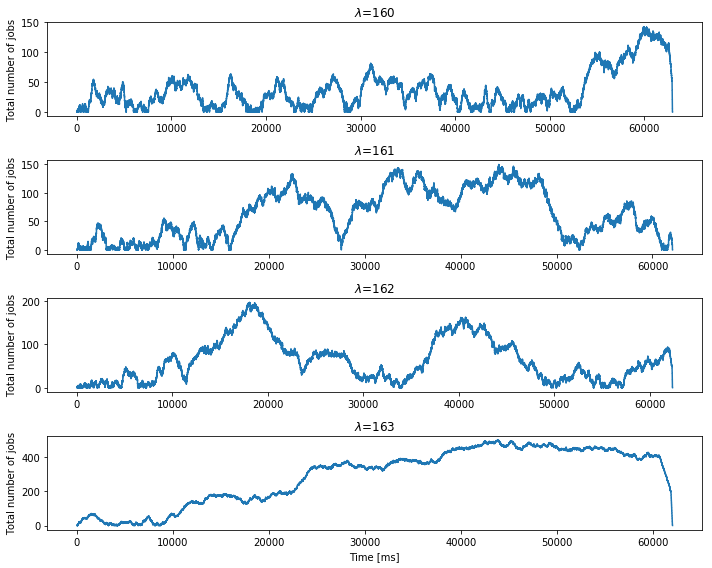

In [42]:
lambdas_to_check = [160, 161, 162, 163]

num_lambdas = len(lambdas_to_check)

fig, ax = plt.subplots(num_lambdas, 1, figsize=(10,2*num_lambdas))

plt.subplots_adjust(hspace = 0.5)
for i, lambda_ in tqdm(enumerate(lambdas_to_check), total=num_lambdas):
    
    server = Server(max_req=MAX_REQ, arrival_rate=lambda_/1000)
    _, _, _, _, buffer, _, _ = server.run()
  
    x, y = list(zip(*buffer))

    ax[i].step(x, y)
    ax[i].set_title(r"$\lambda$=" + str(lambda_))
    ax[i].set_ylabel("Total number of jobs")

ax[-1].set_xlabel("Time [ms]")
plt.tight_layout()
#plt.savefig('q2_lambdas_check.png', dpi=300)
plt.show()

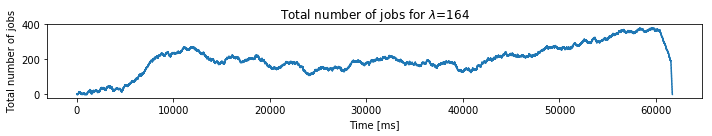

In [15]:
plot_total_num_jobs(lambda_=164)

## Question 3 

Code reuse from previous lab

In [25]:
def calculate_mean_std(data, MLE_std=True):
    n = len(data)
    mean = np.mean(data)
    if MLE_std:
        n -=1
    
    acc = 0
    
    for value in data:
        res = math.pow((value-mean),2)
        acc += res
    std = math.sqrt(acc/n)
    return mean, std

def CI_median_normal(data):
    n = len(data)
    data_sort = np.sort(data)
    j = 0
    k = 0
    if (n == 30):
        # read from the exam booklet
        j = 10
        k = 21
    elif (n>70):
        j = math.floor(0.5 * n - 0.980 * math.sqrt(n))
        k = math.ceil(0.5 * n + 1 + 0.980 * math.sqrt(n))
    else:
        print('Rules are only defined for N=30 and N>70.')
    return data_sort[j-1], data_sort[k-1], np.median(data)

def CI_mean_asymptotic_for_95(data):
    n = len(data)
    mean, std = calculate_mean_std(data,False) 
    U = mean + (1.96*std)/math.sqrt(n)
    L = mean - (1.96*std)/math.sqrt(n)
    
    return L, U, mean

def plot_CI(x_label, y_label, name, n, lambda_, type_CI_mean, type_CI_median, top, bottom, TP=False):
    fig, ax = plt.subplots(1, 1, figsize=(2,10))
    
    L_mean, U_mean, mean =  type_CI_mean
    L_median, U_median, median = type_CI_median

    print("Calculated mean:   {:.5f}".format(mean))
    print("Calculated median: {:.5f}".format(median))
    print("Confidence interval of mean: [{:.5f},{:.5f}]".format(L_mean, U_mean))
    print("Confidence interval of median: [{:.5f},{:.5f}]".format(L_median, U_median)) 
    print("Width size of mean: {:.5f}".format(U_mean - L_mean))
    print("Width size of median: {:.5f}".format(U_median - L_median))
        
    # horizontal lines
    ax.axhline(y=L_mean, linestyle='--', color='b', linewidth=1)
    ax.axhline(y=U_mean, linestyle='--', color='b', linewidth=1)
    ax.axhline(y=L_median, linestyle='--', color='r', linewidth=1)
    ax.axhline(y=U_median, linestyle='--', color='r', linewidth=1)
    
    # vertical lines
    l1 = mlines.Line2D([0.2], [L_mean, U_mean], color='b', linestyle='-', linewidth=1)
    l2 = mlines.Line2D([0.8], [L_median, U_median], color='r', linestyle='-', linewidth=1)
    ax.add_line(l1)
    ax.add_line(l2)
    
    # mean and median markers
    ax.plot([0.2],[mean], marker='o', color='b', markersize=5) 
    ax.plot([0.8],[median], marker= 'o', color='r', markersize=5)
    
    # trick to make nicer plot
    ax.plot([0],[mean], marker='o', alpha=0) 
    ax.plot([1],[median], marker= 'o', alpha=0)

    if TP:
        ax.set_title(r'$\lambda$={} (w/o TP)'.format(str(lambda_), str(n)))
    else:
        ax.set_title(r'$\lambda$={} (w/ TP)'.format(str(lambda_), str(n)))
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_ylim(bottom=bottom, top=top)
    plt.xticks([0.2,0.8], ['Mean', 'Median'])
    plt.locator_params(axis='y', nbins=20)
    plt.savefig(name+'.png', dpi=300, bbox_inches='tight')
    plt.show()

In [16]:
def CI_mean_median_t1_t2(lambda_, N=30, transient_removal_pourcentage=0):

    avg_type1_jobs = []
    avg_type2_jobs = []

    for i in tqdm(range(N)):
        _, _, buffer_t1, buffer_t2, _, _, _ = Server(max_req=MAX_REQ, arrival_rate=lambda_/1000).run()
        
        if transient_removal_pourcentage != 0:
            to_remove = int(MAX_REQ*transient_removal_pourcentage)
            buffer_t1 = buffer_t1[to_remove:]
            buffer_t2 = buffer_t2[to_remove:]
        
        times_t1, count_t1 = list(zip(*buffer_t1))
        times_t2, count_t2 = list(zip(*buffer_t2))

        mean_t1 = np.mean(np.array(count_t1))
        mean_t2 = np.mean(np.array(count_t2))

        avg_type1_jobs.append((mean_t1))
        avg_type2_jobs.append((mean_t2))
        
    return (CI_mean_asymptotic_for_95(avg_type1_jobs), CI_mean_asymptotic_for_95(avg_type2_jobs),
            CI_median_normal(avg_type1_jobs), CI_median_normal(avg_type2_jobs))

In [ ]:
# save simulations so we can always reuse the same data and match results from report

"""CI_lambda_60 = CI_mean_median_t1_t2(lambda_=60)
CI_lambda_160 = CI_mean_median_t1_t2(lambda_=160)

np.save('CI_lambda_60', CI_lambda_60)
np.save('CI_lambda_160', CI_lambda_160)"""

In [26]:
# load results
CI_mean_t1_60, CI_mean_t2_60, CI_median_t1_60, CI_median_t2_60 = np.load('CI_lambda_60.npy')
CI_mean_t1_160, CI_mean_t2_160, CI_median_t1_160, CI_median_t2_160 = np.load('CI_lambda_160.npy')

Calculated mean:   0.62286
Calculated median: 0.62390
Confidence interval of mean: [0.61968,0.62604]
Confidence interval of median: [0.61870,0.62790]
Width size of mean: 0.00636
Width size of median: 0.00920


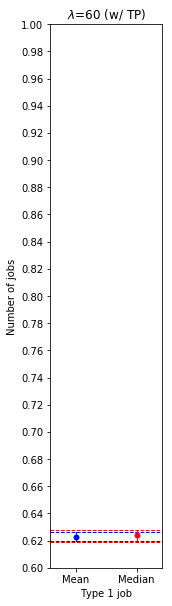

Calculated mean:   0.94487
Calculated median: 0.94730
Confidence interval of mean: [0.93997,0.94977]
Confidence interval of median: [0.93790,0.95180]
Width size of mean: 0.00981
Width size of median: 0.01390


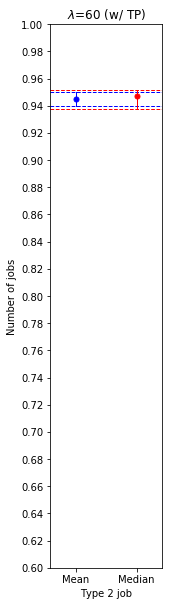

Calculated mean:   31.08114
Calculated median: 21.70185
Confidence interval of mean: [23.85891,38.30338]
Confidence interval of median: [19.02740,30.36170]
Width size of mean: 14.44447
Width size of median: 11.33430


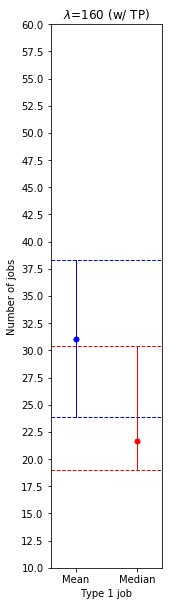

Calculated mean:   31.93599
Calculated median: 22.55935
Confidence interval of mean: [24.71133,39.16065]
Confidence interval of median: [19.87700,31.21690]
Width size of mean: 14.44932
Width size of median: 11.33990


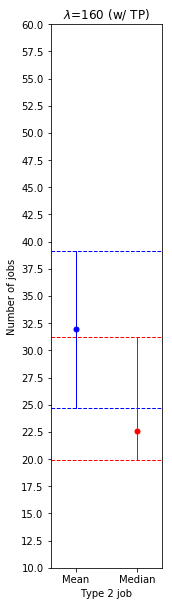

In [27]:
plot_CI(
    x_label="Type 1 job",
    y_label="Number of jobs",
    name="q3_CI_t1_lambda_60",
    n=30,
    lambda_=60,
    type_CI_mean=CI_mean_t1_60,
    type_CI_median=CI_median_t1_60,
    top=1,
    bottom=0.6)
plot_CI(
    x_label="Type 2 job",
    y_label="Number of jobs",
    name="q3_CI_t2_lambda_60",
    n=30,
    lambda_=60,
    type_CI_mean=CI_mean_t2_60,
    type_CI_median=CI_median_t2_60,
    top=1,
    bottom=0.6)
plot_CI(
    x_label="Type 1 job",
    y_label="Number of jobs",
    name="q3_CI_t1_lambda_160",
    n=30,
    lambda_=160,
    type_CI_mean=CI_mean_t1_160,
    type_CI_median=CI_median_t1_160,
    top=60,
    bottom=10)
plot_CI(
    x_label="Type 2 job",
    y_label="Number of jobs",
    name="q3_CI_t2_lambda_160",
    n=30,
    lambda_=160,
    type_CI_mean=CI_mean_t2_160,
    type_CI_median=CI_median_t2_160,
    top=60,
    bottom=10)

### Remove transient state through visual inspection

100%|██████████| 10/10 [00:52<00:00,  5.29s/it]


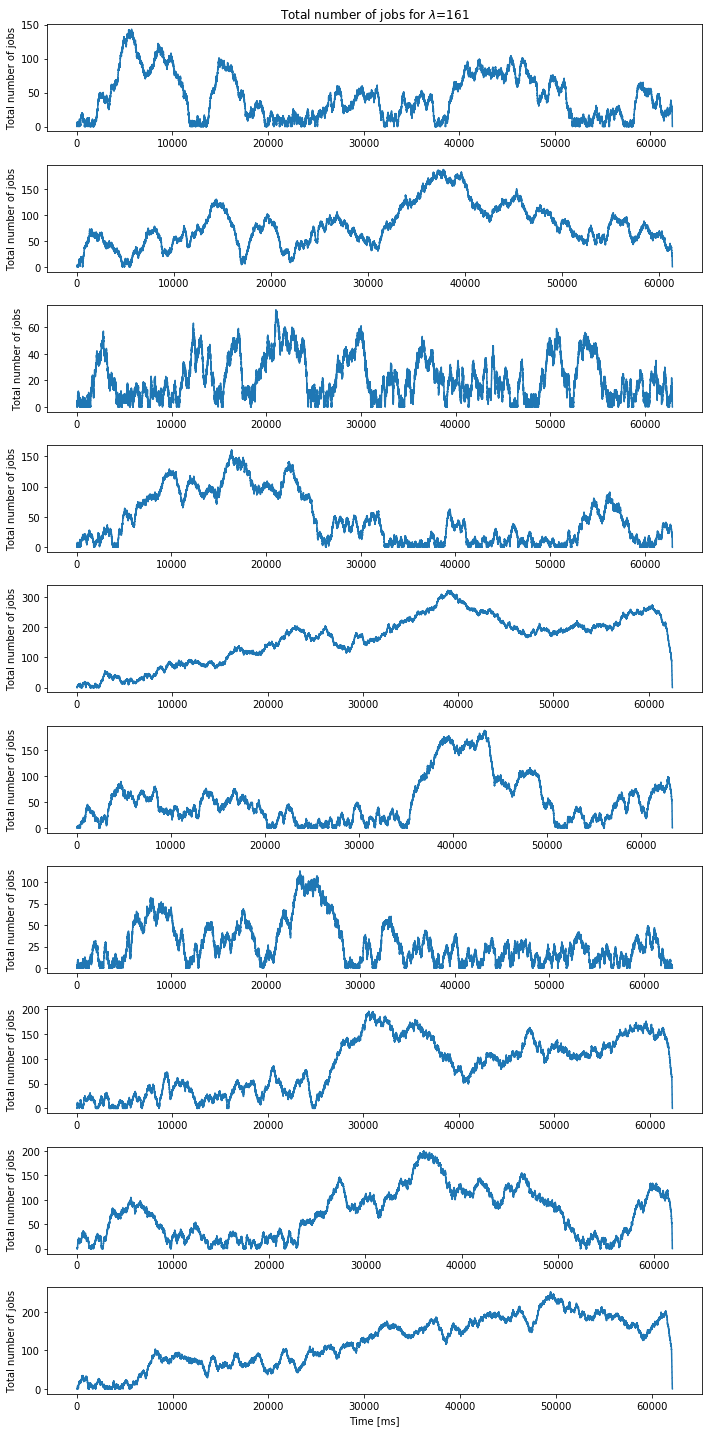

In [19]:
plot_total_num_jobs(lambda_=161, n=10)

In [ ]:
# save simulation so that we can always reuse same data and match results from report

"""pourcentage=0.25

CI_lambda_60_wo_trans = CI_mean_median_t1_t2(lambda_=60, transient_removal_pourcentage=pourcentage)
CI_lambda_160_wo_trans = CI_mean_median_t1_t2(lambda_=160, transient_removal_pourcentage=pourcentage)

np.save('CI_lambda_60_wo_trans', CI_lambda_60_wo_trans)
np.save('CI_lambda_160_wo_trans', CI_lambda_160_wo_trans)"""

In [20]:
# load results
CI_mean_t1_60_wo_trans, CI_mean_t2_60_wo_trans, CI_median_t1_60_wo_trans, CI_median_t2_60_wo_trans = np.load('CI_lambda_60_wo_trans.npy')
CI_mean_t1_160_wo_trans, CI_mean_t2_160_wo_trans, CI_median_t1_160_wo_trans, CI_median_t2_160_wo_trans = np.load('CI_lambda_160_wo_trans.npy')

Calculated mean:   0.62557
Calculated median: 0.62526
Confidence interval of mean: [0.62199,0.62914]
Confidence interval of median: [0.62034,0.62811]
Width size of mean: 0.00715
Width size of median: 0.00777


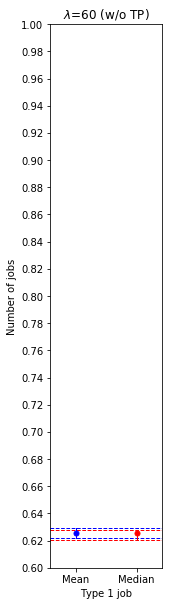

Calculated mean:   0.94910
Calculated median: 0.94714
Confidence interval of mean: [0.94413,0.95408]
Confidence interval of median: [0.94526,0.95280]
Width size of mean: 0.00995
Width size of median: 0.00754


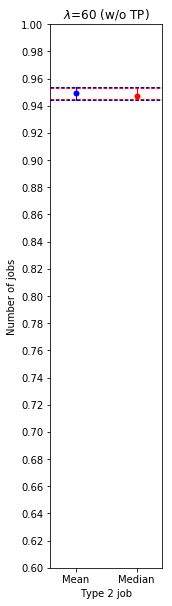

Calculated mean:   34.81846
Calculated median: 26.06977
Confidence interval of mean: [25.66096,43.97596]
Confidence interval of median: [19.22754,39.37943]
Width size of mean: 18.31499
Width size of median: 20.15189


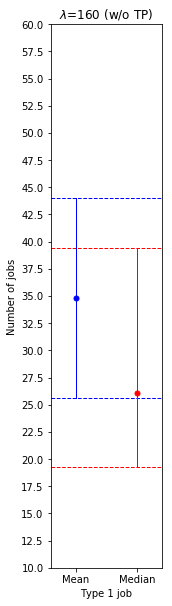

Calculated mean:   35.67487
Calculated median: 26.92943
Confidence interval of mean: [26.51520,44.83454]
Confidence interval of median: [20.08046,40.22960]
Width size of mean: 18.31934
Width size of median: 20.14914


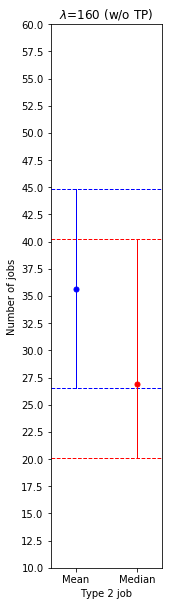

In [28]:
plot_CI(
    x_label="Type 1 job",
    y_label="Number of jobs",
    name="q3_CI_t1_lambda_60_wo_trans",
    n=30,
    lambda_=60,
    type_CI_mean=CI_mean_t1_60_wo_trans,
    type_CI_median=CI_median_t1_60_wo_trans,
    top=1,
    bottom=0.6,
    TP=True)
plot_CI(
    x_label="Type 2 job",
    y_label="Number of jobs",
    name="q3_CI_t2_lambda_60_wo_trans",
    n=30,
    lambda_=60,
    type_CI_mean=CI_mean_t2_60_wo_trans,
    type_CI_median=CI_median_t2_60_wo_trans,
    top=1,
    bottom=0.6,
    TP=True)
plot_CI(
    x_label="Type 1 job",
    y_label="Number of jobs",
    name="q3_CI_t1_lambda_160_wo_trans",
    n=30,
    lambda_=160,
    type_CI_mean=CI_mean_t1_160_wo_trans,
    type_CI_median=CI_median_t1_160_wo_trans,
    top=60,
    bottom=10,
    TP=True)
plot_CI(
    x_label="Type 2 job",
    y_label="Number of jobs",
    name="q3_CI_t2_lambda_160_wo_trans",
    n=30,
    lambda_=160,
    type_CI_mean=CI_mean_t2_160_wo_trans,
    type_CI_median=CI_median_t2_160_wo_trans,
    top=60,
    bottom=10,
    TP=True)

In [16]:
def print_averages(lambda_, transient_removal_pourcentage):
   
    to_remove = int(MAX_REQ*transient_removal_pourcentage)
 
    server = Server(max_req=MAX_REQ, arrival_rate=lambda_/1000)
    _, _, _, _, buffer, art_1, art_2 = server.run()
    
    _,jobs = list(zip(*buffer))
    print("without transient removal")

    R = (art_1+ art_2)
    print("average response time of a job of type 1 for lambda = "+str(lambda_)+": {:.3f}".format(art_1))
    print("average response time of a job of type 2 for lambda = "+str(lambda_)+": {:.3f}".format(art_2))
    print("average response time of a job for lambda = "+str(lambda_)+": {:.3f}".format(R))

    N = np.mean(np.array(jobs))
    lambda_R =  R*lambda_/1000 
    print("number of jobs in the sytem :{:.3f}".format(N ))
    print("lambda x R= {:.3f}".format(lambda_R))
    print("Difference = {:.3f}".format(abs(N-lambda_R) ))
    
    print(5*"---")
    
    print("with transient removal")
    
    art_1_transient = np.mean(server.response_time_t1[to_remove:])
    art_2_transient = np.mean(server.response_time_t2[to_remove:])
    
    R_transient = (art_1_transient+ art_2_transient)
    N_transient = np.mean(np.array(jobs[to_remove:]))
    lambda_R_transient = R_transient * lambda_/1000
    
 
    print("average response time of a job of type 1 for lambda = "+str(lambda_)+": {:.3f}".format(art_1_transient))
    print("average response time of a job of type 2 for lambda = "+str(lambda_)+": {:.3f}".format(art_2_transient))
    print("average response time of a job for lambda = "+str(lambda_)+":{:.3f}".format(R_transient))
    print("number of jobs in the sytem : {:.3f}".format(N_transient))
    print("lambda x R_transient = {:.3f}".format(lambda_R_transient))
    print("Difference = {:.3f}".format(abs(N_transient-lambda_R_transient) ))
    
    

In [17]:
print_averages(60, 0.25)

without transient removal
average response time of a job of type 1 for lambda = 60: 7.326
average response time of a job of type 2 for lambda = 60: 3.493
average response time of a job for lambda = 60: 10.820
number of jobs in the sytem :1.075
lambda x R= 0.649
Difference = 0.426
---------------
with transient removal
average response time of a job of type 1 for lambda = 60: 7.429
average response time of a job of type 2 for lambda = 60: 3.562
average response time of a job for lambda = 60:10.991
number of jobs in the sytem : 1.086
lambda x R_transient = 0.659
Difference = 0.426


In [15]:
print_averages(160, 0.25)

without transient removal
average response time of a job of type 1 for lambda = 160: 97.332
average response time of a job of type 2 for lambda = 160: 94.473
average response time of a job for lambda = 160: 188.945
number of jobs in the sytem :30.290
lambda x R= 30.231
Difference = 0.059
---------------
with transient removal
average response time of a job of type 1 for lambda = 160: 103.785
average response time of a job of type 2 for lambda = 160: 100.987
average response time of a job for lambda = 160:204.772
number of jobs in the sytem : 31.515
lambda x R_transient = 32.764
Difference = 1.249
